In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as plot
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
#Load the data
boston = load_boston()

In [3]:
#Create dataframe for data
features = pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
#Create dataframe for target
target = pd.DataFrame(boston.target,columns=['TARGET'])

In [5]:
#Append features and target along the columns
df = pd.concat([features,target],axis=1)

In [6]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
df.corr('pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
x1 = df['RM']
x2 = df['LSTAT']
y = df['TARGET']

In [9]:
x1 = np.array(x1/x1.mean())
x2 = np.array(x2/x2.mean())
y = np.array(y/y.mean())

In [10]:
n = int(0.8*len(x1))

x1_train = x1[:n]
x2_train = x2[:n]
y_train = y[:n]

x1_test = x1[n:]
x2_test = x2[:n]
y_test = y[n:]

Text(0.5,0,'TARGET')

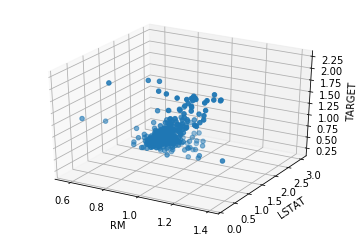

In [11]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(x1_train,x2_train,y_train)
threedee.set_xlabel('RM')
threedee.set_ylabel('LSTAT')
threedee.set_zlabel('TARGET')

In [12]:
#Hypothesis
def h(a,x1,b,x2,c):
    return a*x1+b*x2+c

#Error
def error(a,x1,b,x2,c,t):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power((h(a,x1[i],b,x2[i],c)-t[i]),2)
    return (1/(2*m))*e

def step_gradient(a,x1,b,x2,c,t,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x1)
    for i in range(m):
        grad_a += (2/m) * (h(a,x1[i],b,x2[i],c)-t[i]) * x1[i]
        grad_b += (2/m) * (h(a,x1[i],b,x2[i],c)-t[i]) * x2[i]
        grad_c += (2/m) * (h(a,x1[i],b,x2[i],c)-t[i])
    a = a - (grad_a*learning_rate)
    b = b - (grad_b*learning_rate)
    c = c - (grad_c*learning_rate)
    return a,b,c

def perform_descent(init_a,init_b,init_c,x1,x2,t,learning_rate,iterations):
    a = init_a
    b = init_b
    c = init_c
    for i in range(iterations):
        if i % 1000 ==0:
            e = error(a,x1,b,x2,c,t)
            print('Error: %.30f, a: %.10f, b: %.10f, c: %.10f'%(e,a,b,c))
        a,b,c = step_gradient(a,x1,b,x2,c,t,learning_rate)
    return a,b,c

In [13]:
init_a = 1.75253
init_b = -0.29622
init_c = -0.42729
learning_rate = 0.1
iterations = 10000

final_a,final_b,final_c = perform_descent(init_a,init_b,init_c,x1_train,x2_train,y_train,learning_rate,iterations)

Error: 0.029768696586293604683381985865, a: 1.7525300000, b: -0.2962200000, c: -0.4272900000
Error: 0.029768684199462644435207892002, a: 1.7535351182, b: -0.2960663415, c: -0.4284512587
Error: 0.029768681036128070982460513960, a: 1.7540450763, b: -0.2959882899, c: -0.4290371906
Error: 0.029768680226876287342463456298, a: 1.7543030074, b: -0.2959488122, c: -0.4293335484
Error: 0.029768680019851573997913263270, a: 1.7544334661, b: -0.2959288449, c: -0.4294834429
Error: 0.029768679966890011778790636754, a: 1.7544994507, b: -0.2959187456, c: -0.4295592578
Error: 0.029768679953341266319899460768, a: 1.7545328249, b: -0.2959136375, c: -0.4295976042
Error: 0.029768679949875191670383145492, a: 1.7545497052, b: -0.2959110539, c: -0.4296169994
Error: 0.029768679948988498173978456407, a: 1.7545582431, b: -0.2959097472, c: -0.4296268092
Error: 0.029768679948761644915578017390, a: 1.7545625615, b: -0.2959090862, c: -0.4296317709


Text(0.5,0,'TARGET')

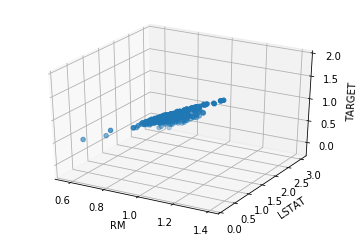

In [14]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(x1_train,x2_train,h(final_a,x1_train,final_b,x2_train,final_c))
threedee.set_xlabel('RM')
threedee.set_ylabel('LSTAT')
threedee.set_zlabel('TARGET')

In [16]:
print(error(final_a,x1_test,final_b,x2_test,final_c,y_test))

0.07591336624153405
